In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [5]:
raw_data = np.genfromtxt("../data/x09.txt", skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

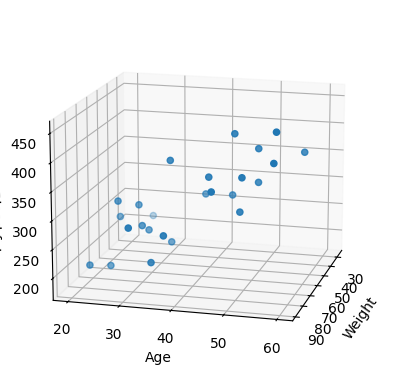

In [6]:
xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs, ys, zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15,15)
plt.show()

In [8]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape((25, 1))

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, )),
])
model.compile(optimizer="rmsprop", loss="mse")

2024-02-26 10:06:19.335880: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 10:06:19.478488: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 10:06:19.478811: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000


2024-02-26 10:07:26.597470: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4ca8a11710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 10:07:26.597539: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 10:07:26.606253: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 3s 3s/step - loss: 95197.8984
Epoch 2/5000
1/1 [==============================] - 0s 7ms/step - loss: 94986.6797
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 94833.6797
Epoch 4/5000
1/1 [==============================] - 0s 7ms/step - loss: 94705.7109
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 94592.2109
Epoch 6/5000
1/1 [==============================] - 0s 6ms/step - loss: 94488.2891
Epoch 7/5000
1/1 [==============================] - 0s 9ms/step - loss: 94391.2031
Epoch 8/5000
1/1 [==============================] - 0s 8ms/step - loss: 94299.2578
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 94211.2969
Epoch 10/5000
1/1 [==============================] - 0s 8ms/step - loss: 94126.5625


2024-02-26 10:07:26.971834: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
I0000 00:00:1708909647.023013    6319 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 11/5000
1/1 [==============================] - 0s 7ms/step - loss: 94044.4062
Epoch 12/5000
1/1 [==============================] - 0s 6ms/step - loss: 93964.4297
Epoch 13/5000
1/1 [==============================] - 0s 9ms/step - loss: 93886.2578
Epoch 14/5000
1/1 [==============================] - 0s 6ms/step - loss: 93809.6172
Epoch 15/5000
1/1 [==============================] - 0s 8ms/step - loss: 93734.2891
Epoch 16/5000
1/1 [==============================] - 0s 7ms/step - loss: 93660.0781
Epoch 17/5000
1/1 [==============================] - 0s 7ms/step - loss: 93586.8594
Epoch 18/5000
1/1 [==============================] - 0s 11ms/step - loss: 93514.4922
Epoch 19/5000
1/1 [==============================] - 0s 10ms/step - loss: 93442.8594
Epoch 20/5000
1/1 [==============================] - 0s 7ms/step - loss: 93371.8984
Epoch 21/5000
1/1 [==============================] - 0s 7ms/step - loss: 93301.5078
Epoch 22/5000
1/1 [==============================] - 0s 6ms/step - loss: 9

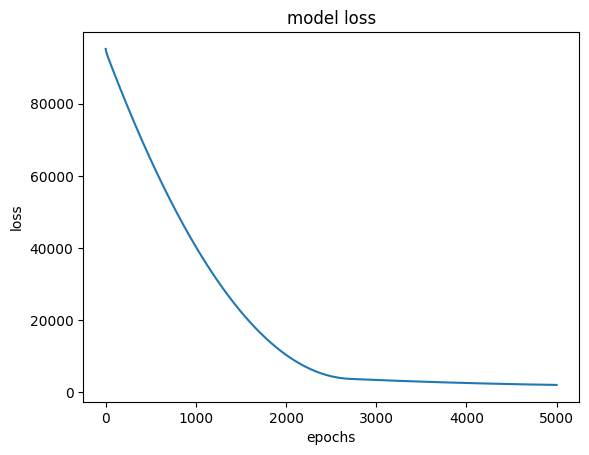

In [12]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [18]:
model.predict(np.array([100, 44]).reshape(1, 2))


1/1 [==============================] - 0s 17ms/step


array([[324.19574]], dtype=float32)

In [14]:
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 [==============================] - 0s 16ms/step


array([[229.56154]], dtype=float32)

In [15]:
W_, b_ = model.get_weights()
print(W_)
print(b_)

[[1.9308889]
 [4.3496647]]
[4.9665956]


In [16]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

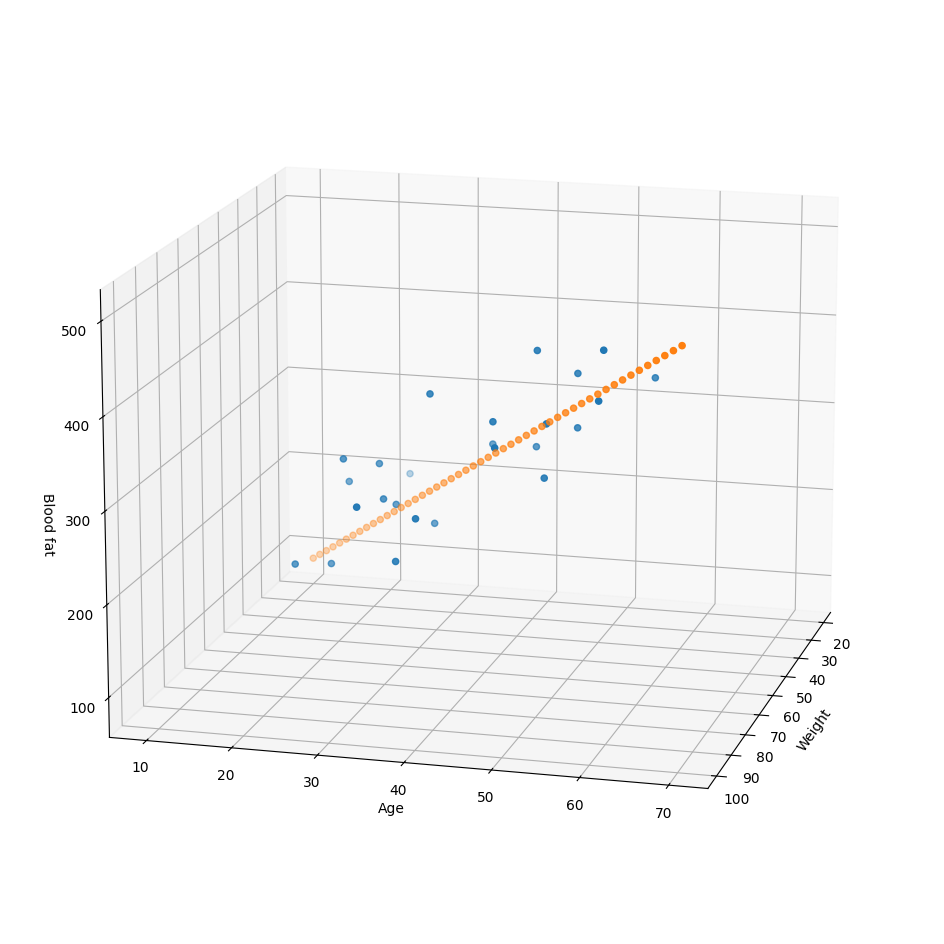

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15, 15)
plt.show()